In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [233]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Sonar_dataset.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [234]:
df.shape

(208, 61)

In [235]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<Axes: xlabel='60'>

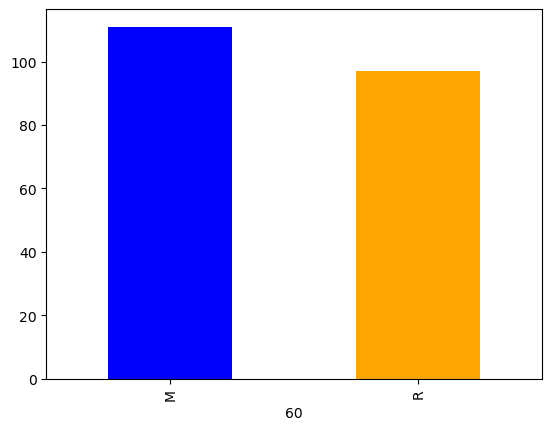

In [236]:
df[60].value_counts().plot(kind='bar', color=['blue', 'orange'])


In [237]:
# x= df.iloc[:, :-1]
# y = df.iloc[:, -1]
# x.head()

In [238]:
x = df.drop(columns=60)
y = df[60]
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [239]:
y = pd.get_dummies(y, drop_first=True, dtype='int')
y.sample

<bound method NDFrame.sample of      R
0    1
1    1
2    1
3    1
4    1
..  ..
203  0
204  0
205  0
206  0
207  0

[208 rows x 1 columns]>

R
0    111
1     97
Name: count, dtype: int64

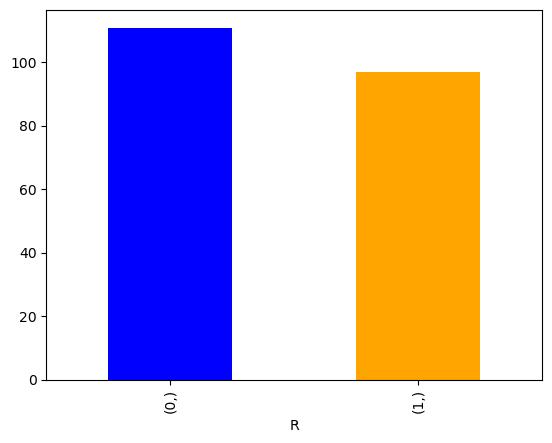

In [240]:
y.value_counts().plot(kind='bar', color=['blue', 'orange'])
y.value_counts()

In [241]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=42)


In [242]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((156, 60), (52, 60), (156, 1), (52, 1))

In [243]:
import tensorflow as tf
from tensorflow import keras

In [244]:
model = keras.Sequential([
    keras.layers.Dense(60, activation='relu', input_shape=(60,)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [245]:
model.fit(x_train, y_train, epochs=100, batch_size=6)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5705 - loss: 0.6884
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5962 - loss: 0.6624 
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: 0.6437 
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: 0.6167 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.5935 
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6731 - loss: 0.5780
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.5199 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7949 - loss: 0.4981 
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.4799 
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.4518 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.4102
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

In [246]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8462 - loss: 0.4132 


[0.41316574811935425, 0.8461538553237915]

In [247]:
y_pred = model.predict(x_test).reshape(-1)
y_pred = np.where(y_pred>0.5, 1, 0)
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0]


In [248]:
y_test[:10]

,R
161,0
15,1
73,1
96,1
166,0
9,1
100,0
135,0
18,1
148,0


In [249]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.79      0.86      0.83        22

    accuracy                           0.85        52
   macro avg       0.84      0.85      0.84        52
weighted avg       0.85      0.85      0.85        52



In [250]:
model1 = keras.Sequential([
    keras.layers.Dense(60, activation='relu', input_shape=(60,)),
    keras.layers.Dropout(0.5),  # Dropout layer with 20% dropout rate
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),  # Another Dropout layer
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.3),  # Another Dropout layer
    keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   
model1.fit(x_train, y_train, epochs=100, batch_size=9)
    

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5192 - loss: 0.7072
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5128 - loss: 0.6966 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5192 - loss: 0.7027 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4808 - loss: 0.6972 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - loss: 0.6907 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4936 - loss: 0.6981 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5897 - loss: 0.6819 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5256 - loss: 0.6780 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5577 - loss: 0.6811 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5705 - loss: 0.6778 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5513 - loss: 0.6679 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [251]:
model1.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9231 - loss: 0.2153 


[0.21533767879009247, 0.9230769276618958]

In [253]:
y_pred1 = model1.predict(x_test).reshape(-1)
y_pred1 = np.where(y_pred1>0.5, 1, 0)
print(classification_report(y_test, y_pred1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.91      0.91      0.91        22

    accuracy                           0.92        52
   macro avg       0.92      0.92      0.92        52
weighted avg       0.92      0.92      0.92        52

